In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tqdm import tqdm

Upload the image in the runtime

In [ ]:
img2=imread("vk2.webp") # write the filename of the image uploaded
img = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
img=cv2.GaussianBlur(img,(7,7),0)

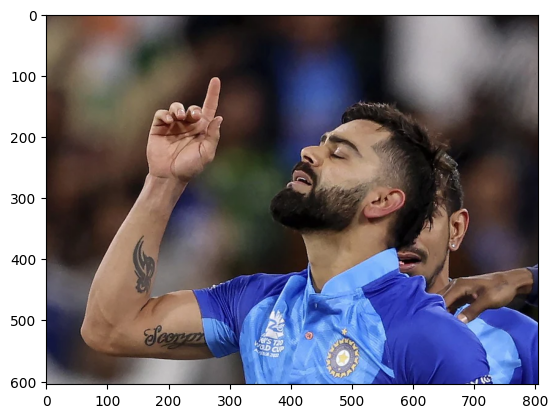

In [ ]:
plt.imshow(img2)

In [ ]:
# adding x and y in [R,G,B]===>[R,G,B,x,y]
img5=img.tolist()
x=img.shape[0]
y=img.shape[1]
for i in range(x):
  for j in range(y):
    img5[i][j].append(i/5)
    img5[i][j].append(j/5)


In [ ]:
img5array = np.array(img5)

In [ ]:
x=img5array.reshape(-1,5)

# Segmentation

In [ ]:
from sklearn.cluster import KMeans
nb=15
km=KMeans(n_clusters=nb)
km.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15)

In [ ]:

img_seg=km.cluster_centers_

In [ ]:
img_seg=img_seg[km.labels_]


In [ ]:
img_seg=img_seg.reshape(img5array.shape)
img_seg= img_seg.astype(int)

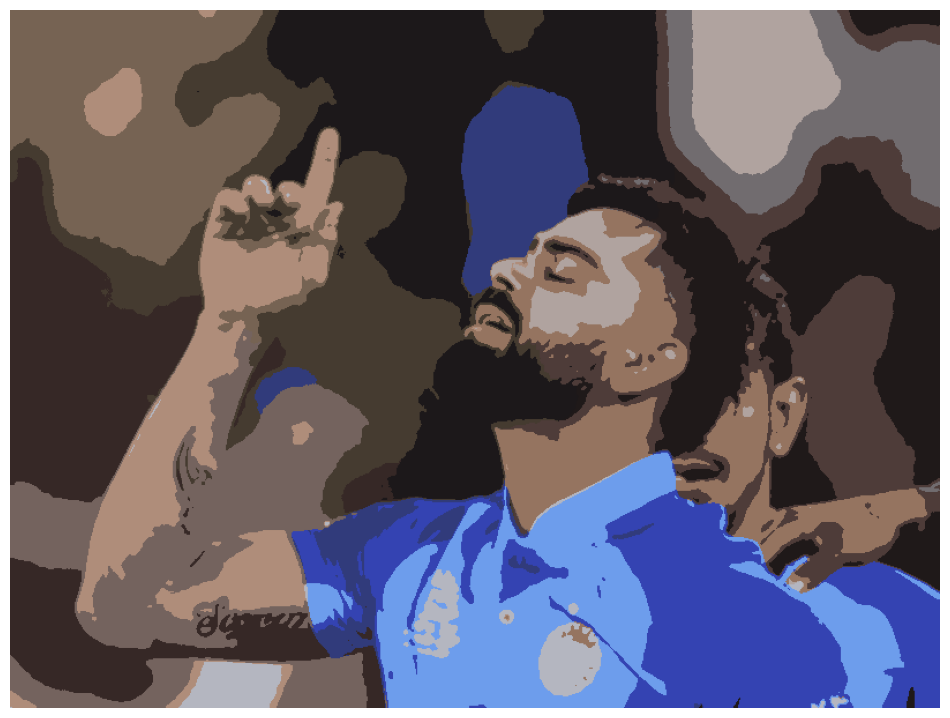

In [ ]:
plt.figure(figsize=(12,10))

plt.axis('off')

plt.imshow(img_seg[:,:,:3])

plt.savefig('image2.jpg')
plt.show()

In [ ]:
colors=km.cluster_centers_[:,:3]
colors= colors.astype(int)


In [ ]:
img_seg3d=img_seg[:,:,:3]

img_colors=np.zeros((nb,img_seg3d.shape[0],img_seg3d.shape[1],img_seg3d.shape[2]), dtype='uint8')
img_tempp=img_seg3d.tolist()



In [ ]:

cv2.imwrite('color_img_bgr.jpg', img_seg3d)


img=cv2.imread("color_img_bgr.jpg")
# cv2.imshow('Image',img)

#CONVERTING TO BGR to RGB
rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite('color_img_rgb.jpg', rgb)

# #Edge detection
# canny=cv2.Canny(img, 125, 175)
# cv2.imwrite('canny.jpg', canny)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True

In [ ]:
#Edge detection
imgedge=cv2.imread("color_img_rgb.jpg")




In [ ]:


#CONVERTING TO GRAYSCALE
gray=cv2.cvtColor(imgedge, cv2.COLOR_BGR2GRAY)



# blur=cv.GaussianBlur(img, (5,5), cv.BORDER_DEFAULT)
# cv.imshow('blur',blur)


# canny=cv.Canny(blur, 125, 175)
# cv.imshow('Canny edges',canny)

ret,thresh=cv2.threshold(gray, 125, 175, cv2.THRESH_BINARY)



#finding contours
contours, hierarchies=cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(f'{len(contours)} contour(s) found!!')

# cv2.drawContours(white, contours, -1, (0,0,0), 2)
# cv2.imwrite('Contours_drawn.jpg', white)


cv2.waitKey(0)

1092 contour(s) found!!


-1

In [ ]:
cv2.imwrite('gray.jpg',gray)

True

In [ ]:
for h in range(nb):
  img_bgr=cv2.imread("color_img_rgb.jpg")
  # img_temp=cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  img_temp=np.array(img_tempp)

  for i in range(img_temp.shape[0]):
    for j in range(img_temp.shape[1]):
       if(img_temp[i,j,0]==np.array(colors[h][0]) and (img_temp[i,j,1]==np.array(colors[h][1]) and img_temp[i,j,2]==np.array(colors[h][2]))  ):
          img_temp[i,j]=np.array(colors[h])
       else:
           img_temp[i,j]=np.array([0,0,0])

  img_colors[h]=img_temp

In [ ]:
imgrefined=np.full(imgedge.shape, 255, dtype='uint8')
for m in range(nb):
            # self.colormap.append([int(c*255) for c in color])
            mask = cv2.inRange(img_colors[m], np.array([2,2,2]), np.array([255,255,255]))
            # print(ind,color)
            # cv2.imwrite(f"./outputs/canvas-{ind}.png", mask)
            # self.plot_figure(mask, f"Canvas {ind}")
            cnts = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
            cnts = cnts[0] if len(cnts) == 2 else cnts[1]

            r=int(colors[m][0])
            g=int(colors[m][1])
            b=int(colors[m][2])


            for contour in cnts:
                # epsilon = 0.001*cv2.arcLength(contour, True)
                # contour = cv2.approxPolyDP(contour, epsilon, True)
                M = cv2.moments(contour)
                if M['m00'] != 0:
                 cx = int(M['m10']/M['m00'])
                 cy = int(M['m01']/M['m00'])


                _, _, width_ctr, height_ctr = cv2.boundingRect(contour)
                if width_ctr > 5 and height_ctr > 5 and cv2.contourArea(contour, True) < -100:
                    cv2.drawContours(imgrefined, [contour], -1, (r,g,b), -1)


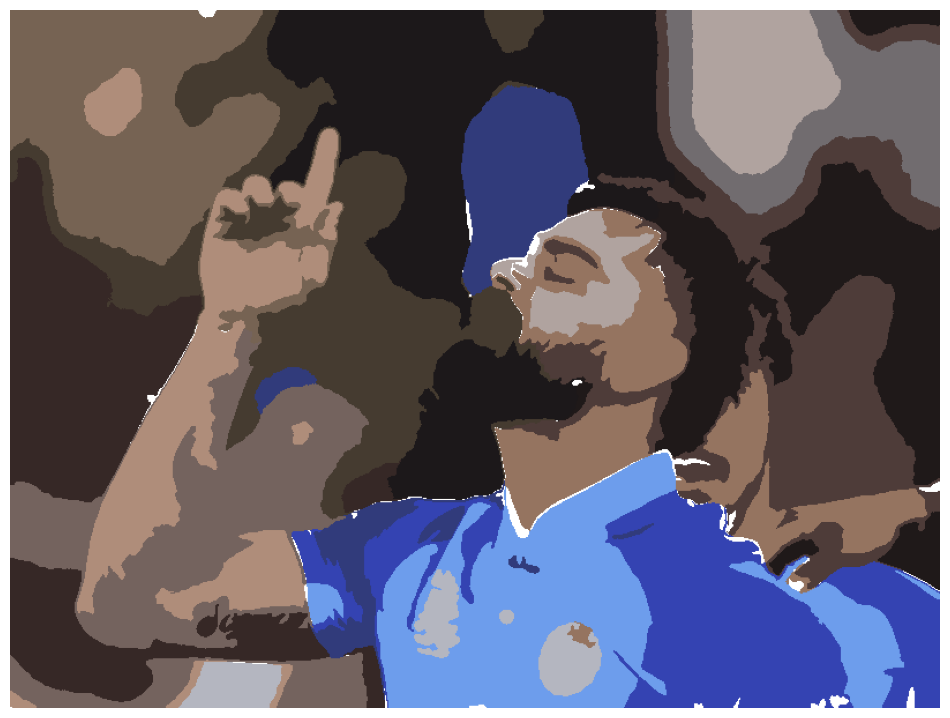

In [ ]:
plt.figure(figsize=(12,10))
plt.axis('off')

plt.imshow(imgrefined)

plt.show()

In [ ]:
imgr=cv2.cvtColor(imgrefined, cv2.COLOR_BGR2RGB)
cv2.imwrite('imagerefined.jpg',imgr)

True

In [ ]:
img_temporary=imgrefined.tolist()

In [ ]:
for h in range(nb):
  img_bgr=cv2.imread("color_img_rgb.jpg")
  # img_temp=cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  img_temp=np.array(img_temporary)

  for i in range(img_temp.shape[0]):
    for j in range(img_temp.shape[1]):
       if(img_temp[i,j,0]==np.array(colors[h][0]) and (img_temp[i,j,1]==np.array(colors[h][1]) and img_temp[i,j,2]==np.array(colors[h][2]))  ):
          img_temp[i,j]=np.array(colors[h])
       else:
           img_temp[i,j]=np.array([0,0,0])

  img_colors[h]=img_temp

In [ ]:
white=np.full(imgedge.shape, 255, dtype='uint8')

In [ ]:
for b in range(nb):
  # adding x and y in [R,G,B]===>[R,G,B,x,y]
  img5=img_colors[b].tolist()
  x=img_colors[b].shape[0]
  y=img_colors[b].shape[1]
  for i in range(x):
    for j in range(y):
      img5[i][j].append(i/5)
      img5[i][j].append(j/5)

####################

  img5array = np.array(img5)
  img5array.shape

#################

  x=img5array.reshape(-1,5)
  x.shape

##################

  from sklearn.cluster import KMeans
  nn=20
  km=KMeans(n_clusters=nn)
  km.fit(x)

###############

  img_seg=km.cluster_centers_
  img_seg
  img_seg=img_seg[km.labels_]
  img_seg.shape
  img_seg=img_seg.reshape(img5array.shape)
  img_seg= img_seg.astype(int)

################

  km_centers_int=np.array(km.cluster_centers_.astype(int))
  km_centers_int_xy=[]
  km_color_centers=[]
  for j in range(nn):
    if(( km_centers_int[j,0]==np.array(colors[b][0]) or km_centers_int[j,0]==np.array(colors[b][0]+1) or km_centers_int[j,0]==np.array(colors[b][0]-1) ) and ( km_centers_int[j,1]==np.array(colors[b][1]) or km_centers_int[j,1]==np.array(colors[b][1]+1) or km_centers_int[j,1]==np.array(colors[b][1]-1) ) and ( km_centers_int[j,2]==np.array(colors[b][2]) or km_centers_int[j,2]==np.array(colors[b][2]+1) or km_centers_int[j,2]==np.array(colors[b][2]-1))  ):
          km_centers_int_xy.append(km_centers_int[j,3:])
          km_color_centers.append(km_centers_int[j,:3])
  km_centers_int_xy=np.array(km_centers_int_xy)
  km_centers_int_xy.shape

  img_colors_grand=np.zeros((nb,km_centers_int_xy.shape[0],img_seg3d.shape[0],img_seg3d.shape[1],img_seg3d.shape[2]), dtype='uint8')

####################

  img_temp3=np.array(img_seg)
  img_gray_colors=[]

  for i in range(img_temp3.shape[0]):
    for j in range(img_temp3.shape[1]):
       if(( img_temp3[i,j,0]==np.array(colors[b][0]) or img_temp3[i,j,0]==np.array(colors[b][0]+1) or img_temp3[i,j,0]==np.array(colors[b][0]-1) ) and ( img_temp3[i,j,1]==np.array(colors[b][1]) or img_temp3[i,j,1]==np.array(colors[b][1]+1) or img_temp3[i,j,1]==np.array(colors[b][1]-1) ) and ( img_temp3[i,j,2]==np.array(colors[b][2]) or img_temp3[i,j,2]==np.array(colors[b][2]+1) or img_temp3[i,j,2]==np.array(colors[b][2]-1))  ):
          # x=km_centers_int_xy[0]
          # y=km_centers_int_xy[]
          for k in range(km_centers_int_xy.shape[0]):
             m=k+1
             img_gray_colors.append([230//m,230//m,230//m])
             if (img_temp3[i,j,3]==km_centers_int_xy[k,0] and img_temp3[i,j,4]==km_centers_int_xy[k,1]):

                img_temp3[i,j,:3]=np.array([230//m,230//m,230//m])


#####################

  for h in range(km_centers_int_xy.shape[0]):

    img_temp=img_temp3[:,:,:3].tolist()
    img_temp=np.array(img_temp)

    for i in range(img_temp.shape[0]):
      for j in range(img_temp.shape[1]):
        if(img_temp[i,j,0]==np.array(img_gray_colors[h][0]) and (img_temp[i,j,1]==np.array(img_gray_colors[h][1]) and img_temp[i,j,2]==np.array(img_gray_colors[h][2]))  ):
          img_temp[i,j]=np.array(img_gray_colors[h])
        else:
           img_temp[i,j]=np.array([0,0,0])

    img_colors_grand[b,h]=img_temp

######################

  for m in range(km_centers_int_xy.shape[0]):
            # self.colormap.append([int(c*255) for c in color])
            mask = cv2.inRange(img_colors_grand[b,m], np.array([2,2,2]), np.array([255,255,255]))
            # print(ind,color)
            # cv2.imwrite(f"./outputs/canvas-{ind}.png", mask)
            # self.plot_figure(mask, f"Canvas {ind}")
            cnts = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
            cnts = cnts[0] if len(cnts) == 2 else cnts[1]


            for contour in cnts:

                M = cv2.moments(contour)
                if M['m00'] != 0:
                 cx = int(M['m10']/M['m00'])
                 cy = int(M['m01']/M['m00'])


                _, _, width_ctr, height_ctr = cv2.boundingRect(contour)
                if width_ctr > 10 and height_ctr > 10 and cv2.contourArea(contour, True) < -100:
                    cv2.drawContours(white, [contour], -1, (112,112,112), 1)

                    #Add label
                    txt_x=cx
                    txt_y=cy
                    if((width_ctr+height_ctr)*0.003>0.5):
                      cv2.putText(white, '{:d}'.format(b+1),
                                   (txt_x, txt_y + 15),
                                   cv2.FONT_HERSHEY_SIMPLEX, (width_ctr+height_ctr)*0.003, (250,0,0), 2)
                    else:
                      cv2.putText(white, '{:d}'.format(b+1),
                                   (txt_x, txt_y + 15),
                                   cv2.FONT_HERSHEY_SIMPLEX, (width_ctr+height_ctr)*0.004, (250,0,0), 1)

#############################

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# making border around image using copyMakeBorder
white = cv2.copyMakeBorder(white, 0, 0, 0, int(white.shape[1]*(0.2)), cv2.BORDER_CONSTANT, value=[255, 255, 255])

In [ ]:
x1=int(0.90*white.shape[1])
y1=int(0.10*white.shape[0])
x2=int(0.94*white.shape[1])
y2=int(0.14*white.shape[0])
# print(x1,x2,y1,y2)
# start_point=(x1,y1)
# end_point=(x2,y2)
# print(colors[0])
# print(start_point)
# print(colors[0][0])

# r=int(colors[0][0])
# g=int(colors[0][1])
# b=int(colors[0][2])

# white = cv2.rectangle(white, (x1,y1), (x2,y2), (r,g,b),-1)
for m in range(nb):
  r=int(colors[m][0])
  g=int(colors[m][1])
  b=int(colors[m][2])
  white = cv2.rectangle(white, (x1,y1), (x2,y2), (r,g,b), -1)
  white = cv2.rectangle(white, (x1,y1), (x2,y2), (0,0,0), 1)
  y1+=int(0.06*white.shape[0])
  y2+=int(0.06*white.shape[0])
  #Add label
  txt_x=int(0.95*white.shape[1])
  txt_y=y1-int(0.05*white.shape[0])
  cv2.putText(white, '{:d}'.format(m + 1), (txt_x, txt_y),
              cv2.FONT_HERSHEY_SIMPLEX, 1, 0, 2)


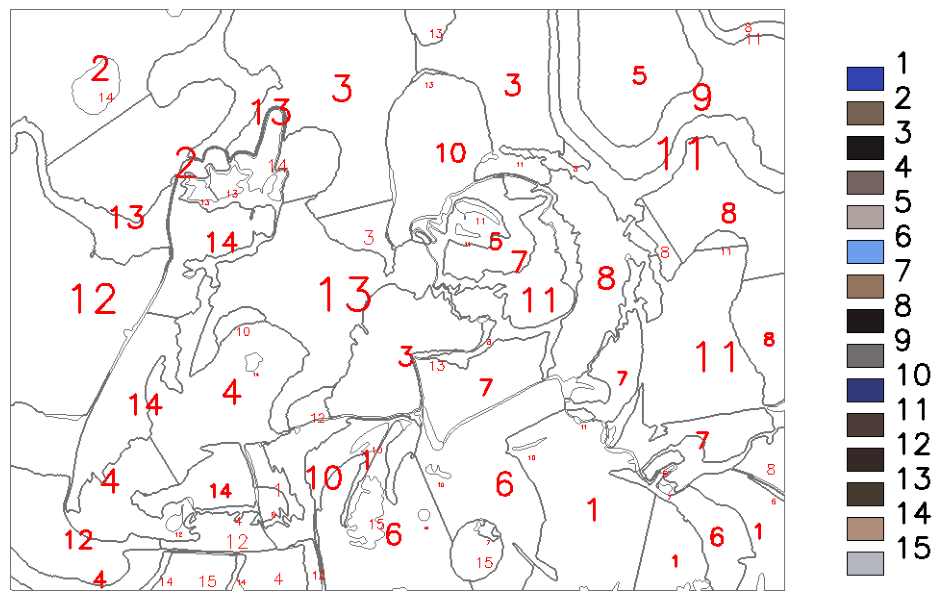

In [ ]:
plt.figure(figsize=(12,10))
plt.axis('off')

plt.imshow(white)

plt.show()

In [ ]:
white=cv2.cvtColor(white, cv2.COLOR_BGR2RGB)
cv2.imwrite('image_complete.jpg',white)

True

In [ ]:
cv2.imwrite('flowervase_complete2.jpg',white)

True